In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Titanic 실습

##### 0. 데이터 불러오기

- Titanic 데이터는 총 891개의 행, 12개의 features로 구성된 데이터셋으로
  타이타닉호에 탑승한 승객의 데이터와 생존여부를 함께 기입한 데이터이다.

In [3]:
df_titanic = pd.read_csv("../01.files/01.Bigdata_basic/titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 1. 데이터 속성 및 기술 통계랑 확인하기
'''
총 12개의 features중 숫자로 구성된 feature는 7개이며, 나머지 5개의 feature는 Object 타입으로 구성되어있다.

'''

'\n총 12개의 features중 숫자로 구성된 feature는 7개이며, 나머지 5개의 feature는 Object 타입으로 구성되어있다.\n\n'

In [5]:
df_titanic.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.76,0.52,0.38,32.20
std,257.35,0.49,0.84,13.00,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,30.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 2. 목표변수 및 설명변수의 분포 확인

In [8]:
'''
목표변수: Survived
설명변수
    범주형: Pclass, Sex, Embarked
    연속형: Age, SibSp, parch, Fare
    이외 : PassengerId, Name, Ticket, Cabin
'''

df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


<Axes: ylabel='Survived'>

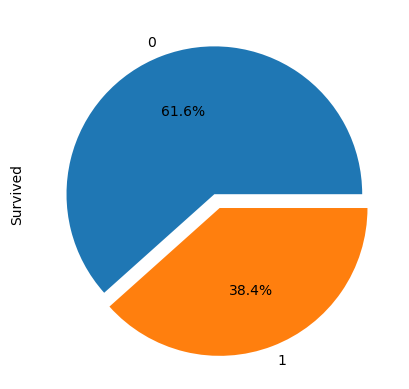

In [11]:
# 891명 중, 생존자는 342명이며, 사망자는 549명이다.

people_count = df_titanic['Survived'].value_counts()
print(people_count)
people_count.plot.pie(autopct = "%.1f%%", explode = [0,0.1])

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64



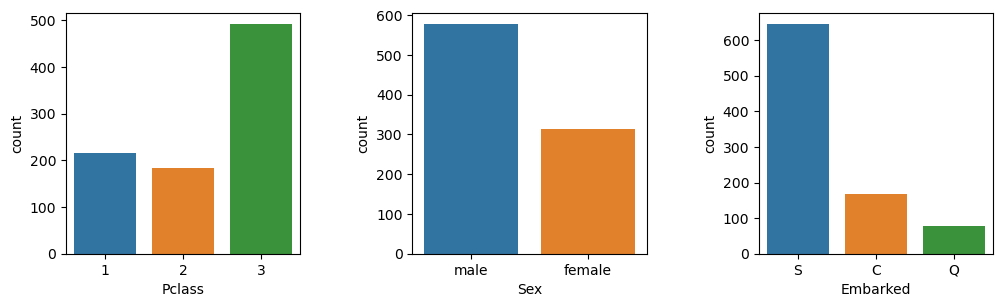

In [12]:
# Pclass, sex, Embarked -> 범주형

'''
승객등급(Pclass)는 3등급이 다른 등급에 비해 월등히 많은 것을 확인할 수 있고,
성별은 남성이 더욱 많은 것이 확인된다.
또한 승객의 탑승장소(Embarked)는 Southampton이 가장 많다.
'''

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
plt.tight_layout(w_pad=5, h_pad=5)


sns.countplot(x='Pclass', data = df_titanic, ax=axes[0])
sns.countplot(x='Sex', data = df_titanic, ax=axes[1])
sns.countplot(x='Embarked', data = df_titanic, ax=axes[2])

print("Pclass")
print(df_titanic["Pclass"].value_counts())
print()

print("Sex")
print(df_titanic["Sex"].value_counts())
print()

print("Embarked")
print(df_titanic["Embarked"].value_counts())
print()


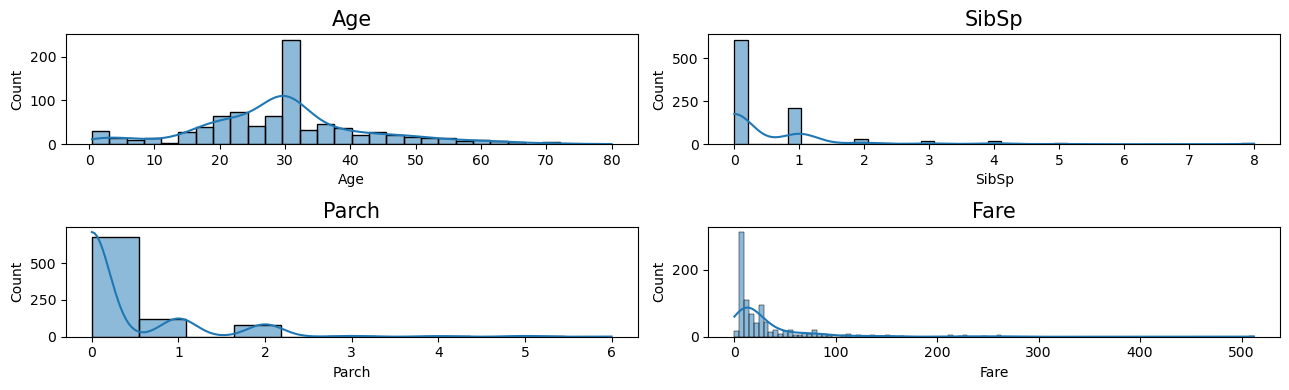

In [13]:
# Age, SibSp, parch, Fare -> 연속형
'''
나이는 0세부터 80세까지 다양하게 분포되어있으나, 30대 초반이 압도적으로 많음을 확인할 수 있으며
SibSp(함께 탑승한 형제, 배우자 수)와 Parch(함께 탑승한 자녀, 부모의 수)의 경우 0명이 가장 많은것으로 보아, 혼자 탑승한 인원이 많음을 알 수 있다.
Fare(티켓 요금)은 승객 등급에 따라 3등석이 가장 많기 때문에 비교적 싼 가격에 많이 분포됨이 확인된다.
'''

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13,4))
plt.tight_layout(w_pad = 5, h_pad = 5)
data_list = [df_titanic["Age"], df_titanic["SibSp"], df_titanic["Parch"], df_titanic["Fare"]]
name_list = ['Age','SibSp','Parch','Fare']

for i in range(4):
    sns.histplot(data_list[i], ax = axes[i // 2, i % 2], kde = True)
    axes[i // 2, i % 2].set_title(name_list[i], fontsize=15)

plt.tight_layout()
plt.show()

In [14]:
# 3. 변수들의 결측 및 이상치 처리

In [15]:
# 결측치
'''
Cabin은 객실 번호로, 결측치가 많고 알 수 있는 직관적 정보가 부족하다고 판단하기에 분석 대상에서 제외하였다.
Embarked는 결측치가 2개밖에 없고, 각 승객의 탑승정보 즉 위치정보를 보여주기에 결측치를 보완하고 진행하기로 결정하였다. 
'''
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_titanic = df_titanic.drop('Cabin', axis = 1) # 결측치가 많은 열은 삭제
df_titanic.fillna('Unknown', inplace =True) # Embarked는 모름으로 채움
df_titanic.isnull().sum() # 결측치 처리 후 확인

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

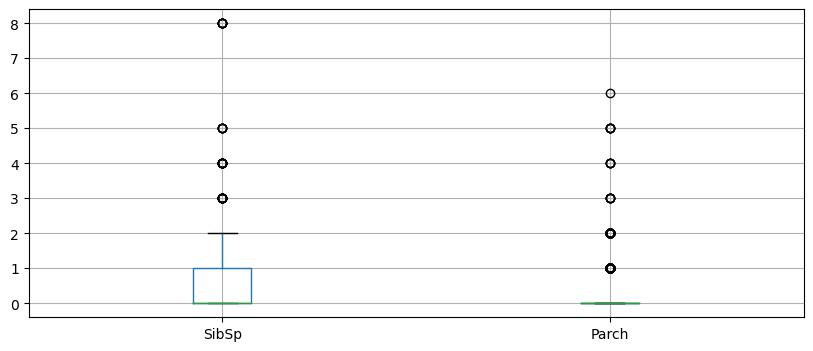

In [17]:
# 이상치

'''
범주형의 경우, 위에서 이미 value_counts함수를 통해 이상값이 없음을 확인
연속형의 경우, 범위가 비슷한 것끼리 모아서 확인하고자 하였음. 또한 PassengerId는 승객의 고유한 번호이므로 분석대상에서 제외함

SibSp와 Parch는 박스를 넘어가는 범위의 데이터가 존재하지만, 각 개인과 가정의 상황에 따라 다르며, 그 차이가 미미하므로 이상치 보정을 적용하지 아니함
'''
df_box = df_titanic.drop(['Survived', 'Pclass', 'PassengerId', 'Fare', 'Age'], axis = 1, inplace = False)
df_box.boxplot(figsize=(10,4))

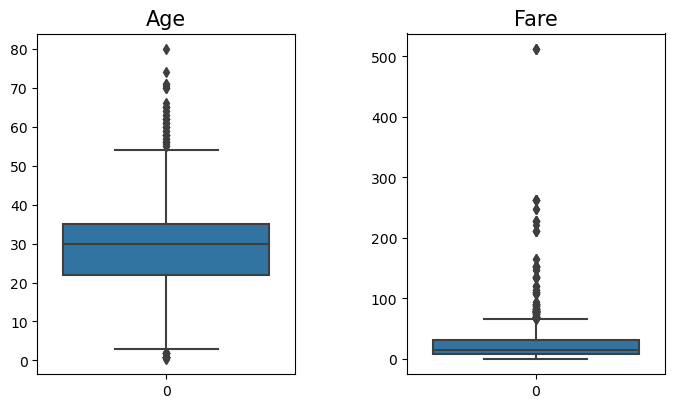

In [18]:
'''
변수 Age, Fare는 위 두 변수에 비하여 범위가 넓은 변수들이므로, 각각 다른 범위를 적용시키기 위해 따로 그래프를 그림.
Age와 Fare도 위 두가지 변수와 마찬가지로, 각 개인에 따라 충분히 다양한 값을 가질 수 있는 변수이므로, 이상치로 판단하지 아니함

다만 Fare의 경우 중앙값이 14.4인것에 비해 max값이 500이 넘어가므로, 
가격의 특성상 있을 수 있는 일이라 판단되지만, 그 간극이 매우 극명하므로 log를 취함으로써 완화시켜 분석에 적용하도록 하였다. 
아래 쉘의 그래프를 확인했을 때 Fare feature의 박스플랏이 완화된 것을 확인할 수 있다.
'''

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 4))
plt.tight_layout(w_pad = 5, h_pad = 5)

data_list = [df_titanic["Age"], df_titanic["Fare"]]
name_list = ['Age', 'Fare']

for i in range(2):
    sns.boxplot(data=data_list[i], ax=axes[i])
    axes[i].set_title(name_list[i], fontsize=15)

df_titanic['Fare'] = df_titanic['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

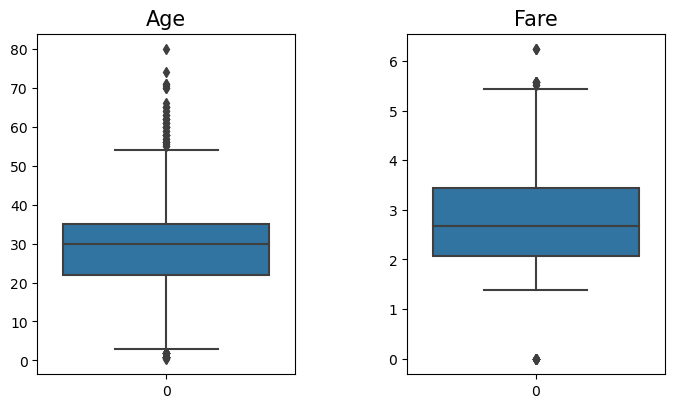

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 4))
plt.tight_layout(w_pad = 5, h_pad = 5)

data_list = [df_titanic["Age"], df_titanic["Fare"]]
name_list = ['Age', 'Fare']

for i in range(2):
    sns.boxplot(data=data_list[i], ax=axes[i])
    axes[i].set_title(name_list[i], fontsize=15)

In [20]:
# 4. 그래프 분석을 통해 변수간 관계를 확인
#변수간 관계를 확인할 때 필요없는 변수 제거 및 파생변수 생성
df_analysis = df_titanic.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = False) #각 승객의 고유한 정보 삭제

df_analysis['AgeGroup'] = (df_analysis['Age']//10).astype(int) # 나이 그룹 생성
df_analysis['Family_cnt'] = df_analysis['SibSp'] + df_analysis['Parch']

df_analysis

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family_cnt
0,0,3,male,22.0,1,0,1.981001,S,2,1
1,1,1,female,38.0,1,0,4.266662,C,3,1
2,1,3,female,26.0,0,0,2.070022,S,2,0
3,1,1,female,35.0,1,0,3.972177,S,3,1
4,0,3,male,35.0,0,0,2.085672,S,3,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,2.564949,S,2,0
887,1,1,female,19.0,0,0,3.401197,S,1,0
888,0,3,female,30.0,1,2,3.154870,S,3,3
889,1,1,male,26.0,0,0,3.401197,C,2,0


<Axes: xlabel='Family_cnt', ylabel='count'>

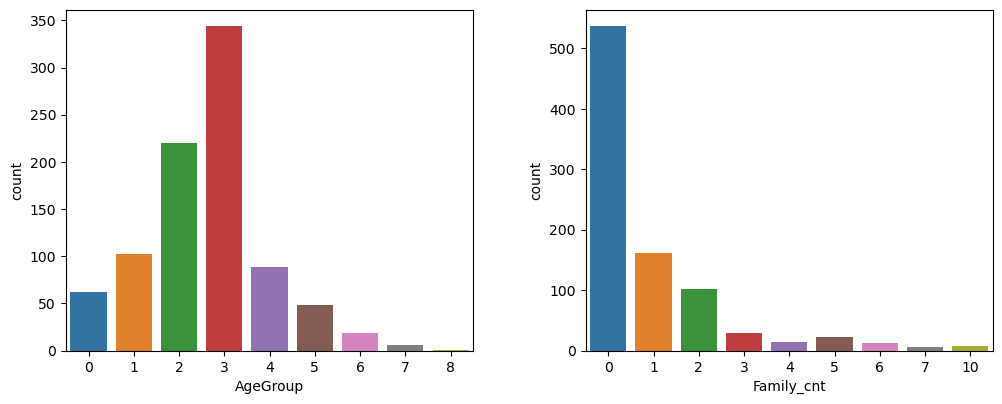

In [21]:
'''
기존의 변수에서 파생한 나이그룹과 함께 동승한 가족의 수를 그래프로 나타내면 다음과 같다. 
위에서 확인한것과 마찬가지로, 30대가 가장 많고, 혼자 탑승한 사람이 가장 많음을 확인할 수 있다.
'''

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
plt.tight_layout(w_pad = 5, h_pad = 5)


sns.countplot(x='AgeGroup', data = df_analysis, ax=axes[0])
sns.countplot(x='Family_cnt', data = df_analysis, ax=axes[1])

<Axes: >

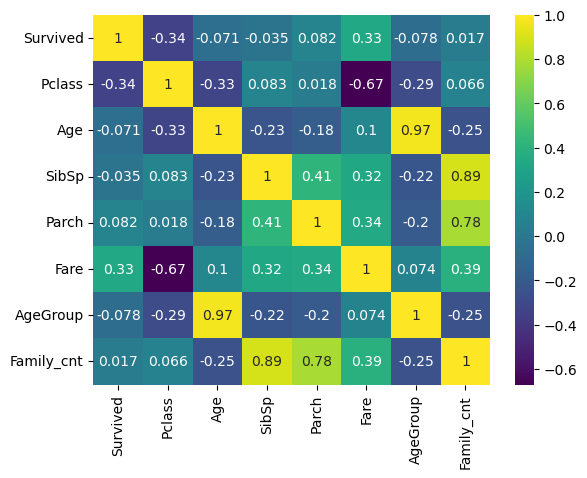

In [22]:
'''
승객 등급(Pclass)와 티켓요금(Fare)의 관계
승객 등급(Pclass)와 승객 나이(Age)의 관계 (+ AgeGroup)
승객 등급(Pcalss)와 생존(Survived)의 관계
생존(Survived)와 티켓요금(Fare)의 관계
가족 수(Family_cnt)와 티켓요금(Fare)의 관계

에서 다른 값에 비해 높은 상관관계를 확인할 수 있다. 

이로 미루어 볼 때, 상대적으로 부유한 사람이 좋은 좌석을 갖고, 생존 확률이 더 높았다는 가설을 세울 수 있다. 
또한 가족을 많이 데리고 탑승한 경우 상대적으로 티켓 가격을 높게 주었을 가능성이 높다는 것을 발견할 수 있다.
'''
df_corr = df_analysis.corr()
sns.heatmap(df_corr, annot = True, cmap= "viridis")

<Axes: xlabel='Family_cnt', ylabel='Survived'>

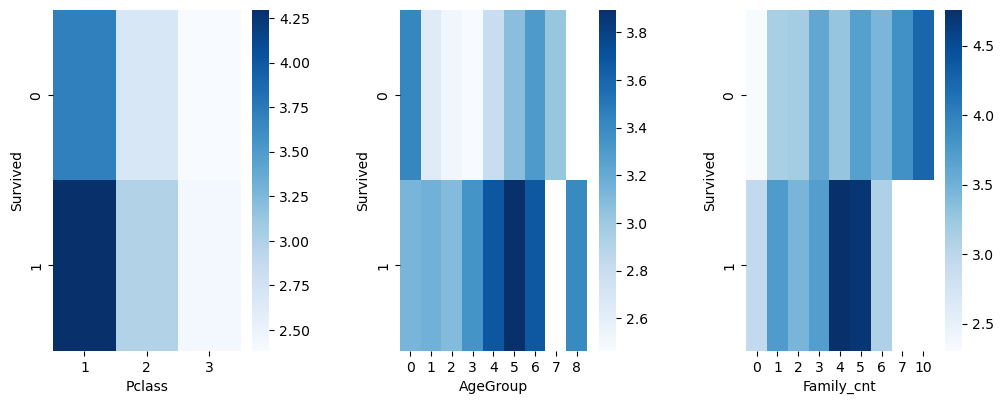

In [23]:
'''
첫번째 그래프는 승객등급과 생존여부를 그룹화하여 각 티켓 가격을 나타낸 히트맵이다. 1등석에 가격을 가장 많이 낸 사람일수록 생존확률이 올라감을 확인할 수 있다.
두번째 그래프는 나이그룹과 생존여부를 그룹화하여 각 티켓 가격을 나타낸 히트맵이다. 50대의 티켓 가격을 비싸게 지불한 사람이 많이 생존했음을 확인할 수 있다.
세번째 그래프는 같이 온 가족의 명수와 생존여부를 그룹화하여 각 티켓 가격을 나타낸 히트맵이다. 4~5명의 가족과 함께 온 사람들의 생존확률이 높음을 알 수 있다. 

'''
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 4))
plt.tight_layout(w_pad = 5, h_pad = 5)

df_agg = df_analysis.groupby(["Pclass","Survived"], as_index=False)['Fare'].agg("mean")
df_pivot = df_agg.pivot("Survived", "Pclass", "Fare")
sns.heatmap(df_pivot, cmap="Blues", ax = axes[0])

df_agg = df_analysis.groupby(["AgeGroup","Survived"], as_index=False)['Fare'].agg("mean")
df_pivot = df_agg.pivot("Survived", "AgeGroup", "Fare")
sns.heatmap(df_pivot, cmap="Blues", ax = axes[1])

df_agg = df_analysis.groupby(["Family_cnt","Survived"], as_index=False)['Fare'].agg("mean")
df_pivot = df_agg.pivot("Survived", "Family_cnt", "Fare")
sns.heatmap(df_pivot, cmap="Blues", ax = axes[2])

In [24]:
'''
5. 생존에 영향을 미치는 잠재인자 도출
위의 분석으로 미루어 볼 때, 생존확률에 영향을 미치는 요인은 객실 등급과 티켓의 가격이라고 분석된다. 
가족의 수를 생존에 영향을 미치는 요인으로 포함하지 않은 이유는, 5명의 가족이 함께 탔다면, 이 가족은 함께 탄 가족의 수를 공유하고 있으며,
티켓의 가격도 동일하였을것이라고 추측된다. 이에 따라 데이터에 노이즈가 생기는 원인이 될 수도 있다고 판단했다. 

결론적으로, 생존확률에 도움을 주는 요인은 객실 등급과 티켓의 가격이다.
'''

'\n5. 생존에 영향을 미치는 잠재인자 도출\n위의 분석으로 미루어 볼 때, 생존확률에 영향을 미치는 요인은 객실 등급과 티켓의 가격이라고 분석된다. \n가족의 수를 생존에 영향을 미치는 요인으로 포함하지 않은 이유는, 5명의 가족이 함께 탔다면, 이 가족은 함께 탄 가족의 수를 공유하고 있으며,\n티켓의 가격도 동일하였을것이라고 추측된다. 이에 따라 데이터에 노이즈가 생기는 원인이 될 수도 있다고 판단했다. \n\n결론적으로, 생존확률에 도움을 주는 요인은 객실 등급과 티켓의 가격이다.\n'

### 탐색적 분석, 통계분석 실습

In [25]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [26]:
# 217p

df_cars = pd.read_csv("../01.files/01.Bigdata_basic/mycars.csv")
df_cars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [27]:
# 시내에서의 연비 통계치

df = df_cars[['driving', 'mpg']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [28]:
# 고속도로에서의 연비 통계치

df = df_cars[['driving', 'highway_mileage']]
df.groupby('driving').describe()

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

In [29]:
'''
전체 데이터의 카운터로 보았을 때, 구동방식이 4와 f인 차가 r에 비해 많이 보급된 차로 예측된다.

또한 위 기술통계를 통해 봤을때, 고속도로에서의 연비가 시내에서의 연비보다 약간 더 높은것이 확인된다.
특히 두 집단 모두에서 f의 연비가 더 좋은데, 이는 f가 다른 구동방식에 비해 도로의 컨디션에 구애받지 않고 연비가 좋다는 것을 확인할 수 있다. 
'''

'\n전체 데이터의 카운터로 보았을 때, 구동방식이 4와 f인 차가 r에 비해 많이 보급된 차로 예측된다.\n\n또한 위 기술통계를 통해 봤을때, 고속도로에서의 연비가 시내에서의 연비보다 약간 더 높은것이 확인된다.\n특히 두 집단 모두에서 f의 연비가 더 좋은데, 이는 f가 다른 구동방식에 비해 도로의 컨디션에 구애받지 않고 연비가 좋다는 것을 확인할 수 있다. \n'

In [30]:
# 220p

df_220 = df_cars[['driving', 'model']]
count = df_220['driving'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Flaws'
count_data.round(2)

Flaws,Count,CumCnt,Percent,CumPct
4,103,103,44.02,44.02
f,106,209,45.30,89.32
r,25,234,10.68,100.00


In [31]:
'''
위 데이터로 보았을 때, 구동방식이 4와 f인 것이 전체 데이터의 대부분(89%)를 차지하고 있는 것을 알 수 있다. 
'''

'\n위 데이터로 보았을 때, 구동방식이 4와 f인 것이 전체 데이터의 대부분(89%)를 차지하고 있는 것을 알 수 있다. \n'